   <p style="font-size:32px;text-align:center"> <b> Cancer diagnosis using Genetic Data (Personal case study) <p style="font-size:25px;text-align:center"> <b> - by Arindam Dutta</b> </p></b> </p>

### DATASET - Memorial Sloan Kettering Cancer Center (MSKCC)
##### training_variants.zip and training_text.zip from Kaggle.

### Problem - To classify the given genetic variations/mutations based on evidence from text-based clinical literature.

<p style="font-size:20px;text-align:center"> <b> Real-world Objectives and Constraints </b> </p>

* low-latency is not mandatory.
* Model should be highly interpretable.
* Errors can be deadly.
* Probability of a data-point belonging to each class is required.

## Data Insights

 - Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment/data
-  2 data files: (training_variants) has the information about genetic mutations and the (training_text) contains the clinical evidence (texts) that  human experts/pathologists use to classify the genetic mutations. 
- Both these data files are have a common column called ID
- <p> 
    Data file's information:
    <ul> 
        <li>
        training_variants (ID , Gene, Variations, Class)
        </li>
        <li>
        training_text (ID, Text)
        </li>
    </ul>
</p>

### Features in training_variants 

#### ID,Gene,Variation,Class
##### 0,FAM58A,Truncating Mutations,1
##### 1,CBL,W802*,2
##### 2,CBL,Q249E,2


### Features in training_text
#### ID,Text
##### ID,Text
0||Cyclin-dependent kinases (CDKs) regulate a variety of fundamental cellular processes. CDK10 stands out as one of the last orphan CDKs for which no activating cyclin has been identified and no kinase activity revealed. Previous work has shown that CDK10 silencing increases ETS2 (v-ets erythroblastosis virus E26 oncogene homolog 2)-driven activation of the MAPK pathway, which confers tamoxifen resistance to breast cancer cells. The precise mechanisms by which CDK10 modulates ETS2 activity, and more generally the functions of CDK10, remain elusive. Here we demonstrate that CDK10 is a cyclin-dependent kinase by identifying cyclin M as an activating cyclin. Cyclin M, an orphan cyclin, is the product of FAM58A, whose mutations cause STAR syndrome, a human developmental anomaly whose features include toe syndactyly, telecanthus, and anogenital and renal malformations. We show that STAR syndrome-associated cyclin M mutants are unable to interact with CDK10. Cyclin M silencing phenocopies CDK10 silencing in increasing c-Raf and in conferring tamoxifen resistance to breast cancer cells. CDK10/cyclin M phosphorylates ETS2 in vitro, and in cells it positively controls ETS2 degradation by the proteasome. ETS2 protein levels are increased in cells derived from a STAR patient, and this increase is attributable to decreased cyclin M levels. Altogether, our results reveal an additional regulatory mechanism for ETS2, which plays key roles in cancer and development. They also shed light on the molecular mechanisms underlying STAR syndrome.Cyclin-dependent kinases (CDKs) play a pivotal role in the control of a number of fundamental cellular processes (1). The human genome contains 21 genes encoding proteins that can be considered as members of the CDK family owing to their sequence similarity with bona fide CDKs, those known to be activated by cyclins (2). Although discovered almost 20 y ago (3, 4), CDK10 remains one of the two CDKs without an identified cyclin partner. This knowledge gap has largely impeded the exploration of its biological functions. CDK10 can act as a positive cell cycle regulator in some cells (5, 6) or as a tumor suppressor in others (7, 8)......till (9)

### There are 9 classes(yi's) for the genetic mutation i.e [0,1,2....9] & hence it is a Multi-Class Classification Problem 

### The performance metrics(KPI's)| used 
Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment#evaluation

Metric(s): 
* Multi class log-loss 
* Confusion matrix 


## Main Objective - 
## Using Machine Learning to predict the probability of each data-point belonging to each of the nine classes.

### Performing Exploratory Data Analysis (EDA)

In [1]:
# Standard Libraries for visualizations & EDA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# Ml Libraries 

import re
import time
import warnings
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize

# Count vectorizer for one-hot-encoding
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.cross_validation import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

# This will help give the important feature values and provides a better presentation with text and data.
from tabulate import tabulate

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


### Loading the Datasets 

#### Loading the training_variants dataset

In [2]:
df = pd.read_csv('training/training_variants')

In [3]:
print('Number of data points : ', len(df))

# shape[1] reads the no. of columns shape[0] will give no. of rows
print('Number of features : ', df.shape[1])
print('Features : ', df.columns.values)

df.head()

Number of data points :  3321
Number of features :  4
Features :  ['ID' 'Gene' 'Variation' 'Class']


,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4


<p> <br>
    Fields are 
    <ul>
        <li><b>ID : </b>the id of the row used to link the mutation to the clinical evidence</li>
        <li><b>Gene : </b>the gene where this genetic mutation is located </li>
        <li><b>Variation : </b>the aminoacid change for this mutations </li>
        <li><b>Class :</b> 1-9 the class this genetic mutation has been classified on</li>
    </ul>

In [4]:
################################################## More insights ###############################################################

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3321 entries, 0 to 3320
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         3321 non-null   int64 
 1   Gene       3321 non-null   object
 2   Variation  3321 non-null   object
 3   Class      3321 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 103.9+ KB


In [5]:
df.shape[1]

4

#### Reading the training_text file which contains the Text Data

In [6]:
df_text =pd.read_csv("training/training_text",sep="\|\|",engine="python",names=["ID","TEXT"],skiprows=1)
print('Number of data points : ', len(df_text))

# shape[1] reads the no. of columns shape[0] will give no. of rows
print('Number of features : ', df_text.shape[1]) 
print('Features : ', df_text.columns.values)
df_text.head()

Number of data points :  3321
Number of features :  2
Features :  ['ID' 'TEXT']


,ID,TEXT
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...
3,3,Recent evidence has demonstrated that acquired...
4,4,Oncogenic mutations in the monomeric Casitas B...


### Text Data Preprocessing 

In [7]:
################################################## STOP_WORDS REMOVAL #######################################################

In [8]:
# loading stop words from nltk library

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Arindam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:

stop_words = set(stopwords.words('english')) # using set to remove repeated stop words in english


def nlp_preprocessing(total_text, index, column):
    if type(total_text) is not int:
        string = "" 
        # replace every special char with space
        total_text = re.sub('[^a-zA-Z0-9\n]', ' ', total_text)
        # replace multiple spaces with single space
        total_text = re.sub('\s+',' ', total_text)
        # converting all the chars into lower-case.
        total_text = total_text.lower()
        
        for word in total_text.split():
        # if the word is a not a stop word then retain that word from the data
            if not word in stop_words:
                string += word + " "
        
        df_text[column][index] = string

In [10]:
#text processing stage and filtering out the blank value ids with no text data 

start_time = time.clock()
for index, row in df_text.iterrows():
    if type(row['TEXT']) is str:
        nlp_preprocessing(row['TEXT'], index, 'TEXT')
    else:
        print("there is no text description for id:",index)
print('Time took for preprocessing the text :',time.clock() - start_time, "seconds")

there is no text description for id: 1109
there is no text description for id: 1277
there is no text description for id: 1407
there is no text description for id: 1639
there is no text description for id: 2755
Time took for preprocessing the text : 49.444549599999995 seconds


### JOINING both training_variations and training_text data based on common 'ID' columns

In [11]:
new_df = pd.merge(df, df_text,on='ID', how='left') #similar to the left JOIN
new_df.head()

,ID,Gene,Variation,Class,TEXT
0,0,FAM58A,Truncating Mutations,1,cyclin dependent kinases cdks regulate variety...
1,1,CBL,W802*,2,abstract background non small cell lung cancer...
2,2,CBL,Q249E,2,abstract background non small cell lung cancer...
3,3,CBL,N454D,3,recent evidence demonstrated acquired uniparen...
4,4,CBL,L399V,4,oncogenic mutations monomeric casitas b lineag...


In [12]:
# Finding null values if there is any in the columns

new_df[new_df.isnull().any(axis=1)]

,ID,Gene,Variation,Class,TEXT
1109,1109,FANCA,S1088F,1,NaN
1277,1277,ARID5B,Truncating Mutations,1,NaN
1407,1407,FGFR3,K508M,6,NaN
1639,1639,FLT1,Amplification,6,NaN
2755,2755,BRAF,G596C,7,NaN


In [13]:
new_df.loc[new_df['TEXT'].isnull(),'TEXT'] = new_df['Gene'] +' '+new_df['Variation']


In [14]:
new_df[new_df['ID']==1109]

,ID,Gene,Variation,Class,TEXT
1109,1109,FANCA,S1088F,1,FANCA S1088F


### Train, Cross-validation and Test Data Splitting
#### Splitting the Data into Train, Cross-Validation(CV) & Test with 64%,16%, 20% of data distributions respectively

In [15]:
y_actual = new_df['Class'].values
# Replacing spaces 
new_df.Gene = new_df.Gene.str.replace('\s+','_')

new_df.Variation = new_df.Variation.str.replace('\s+','_')

# splitting the data into test and train by maintaining same distribution of output variable 'y_actual' [stratify = y_actual] 
# testsize = 0.2 i.e 20% or the ratio of train/test is 80/20
X_train, test_df, y_train, y_test = train_test_split(new_df, y_actual, stratify=y_actual, test_size=0.2) 

# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
train_df, cv_df, y_train, y_cv = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2)

#### We split the data into train, test and cross validation data sets, preserving the ratio of class distribution in the original data set

In [16]:
# .shape[0] gives the total no. of rows i.e data points and .shape[1] gives the total no. of columns i.e features 

print('Number of data points in train data:', train_df.shape[0]) 
print('Number of data points in test data:', test_df.shape[0])
print('Number of data points in cross validation data:', cv_df.shape[0])


Number of data points in train data: 2124
Number of data points in test data: 665
Number of data points in cross validation data: 532


### Comparing the distributions of yi's in train,cv and test data sets and check if there is an imbalance

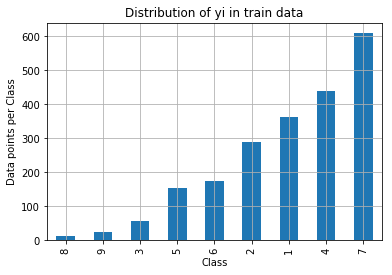

Number of data points in class 9 : 609 ( 28.672 %)
Number of data points in class 8 : 439 ( 20.669 %)
Number of data points in class 7 : 363 ( 17.09 %)
Number of data points in class 6 : 289 ( 13.606 %)
Number of data points in class 5 : 176 ( 8.286 %)
Number of data points in class 4 : 155 ( 7.298 %)
Number of data points in class 3 : 57 ( 2.684 %)
Number of data points in class 2 : 24 ( 1.13 %)
Number of data points in class 1 : 12 ( 0.565 %)
--------------------------------------------------------------------------------


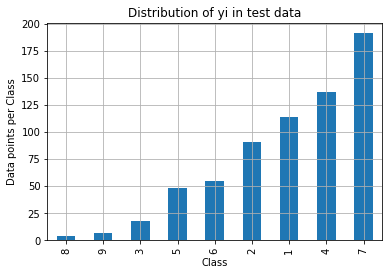

Number of data points in class 9 : 191 ( 28.722 %)
Number of data points in class 8 : 137 ( 20.602 %)
Number of data points in class 7 : 114 ( 17.143 %)
Number of data points in class 6 : 91 ( 13.684 %)
Number of data points in class 5 : 55 ( 8.271 %)
Number of data points in class 4 : 48 ( 7.218 %)
Number of data points in class 3 : 18 ( 2.707 %)
Number of data points in class 2 : 7 ( 1.053 %)
Number of data points in class 1 : 4 ( 0.602 %)
--------------------------------------------------------------------------------


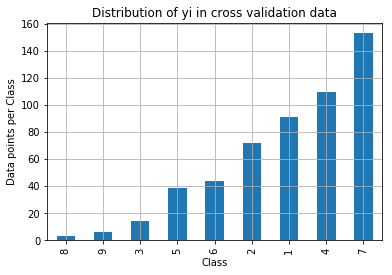

Number of data points in class 9 : 153 ( 28.759 %)
Number of data points in class 8 : 110 ( 20.677 %)
Number of data points in class 7 : 91 ( 17.105 %)
Number of data points in class 6 : 72 ( 13.534 %)
Number of data points in class 5 : 44 ( 8.271 %)
Number of data points in class 4 : 39 ( 7.331 %)
Number of data points in class 3 : 14 ( 2.632 %)
Number of data points in class 2 : 6 ( 1.128 %)
Number of data points in class 1 : 3 ( 0.564 %)


In [17]:
# 'sort_values' is new in version 0.17.0. 

train_yi_dist = train_df['Class'].value_counts().sort_values()
cv_yi_dist = cv_df['Class'].value_counts().sort_values()
test_yi_dist = test_df['Class'].value_counts().sort_values()

train_yi_dist.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()


# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_yi_dist.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',train_yi_dist.values[i], '(', np.round((train_yi_dist.values[i]/train_df.shape[0]*100), 3), '%)')
       

print('-'*80)
my_colors = 'rgbkymc'
test_yi_dist.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in test data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-test_yi_dist.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',test_yi_dist.values[i], '(', np.round((test_yi_dist.values[i]/test_df.shape[0]*100), 3), '%)')

print('-'*80)
my_colors = 'rgbkymc'
cv_yi_dist.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in cross validation data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-cv_yi_dist.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',cv_yi_dist.values[i], '(', np.round((cv_yi_dist.values[i]/cv_df.shape[0]*100), 3), '%)')



#### From the plot we confirm that this is an imbalanced data but the yi' values are close in all train, cv and test samples 
#### hence we can now apply machine Learning models successfully 

### Creating a base RANDOM or DUMB Model to set a estimate or threshold Log-Loss 
#### For a random model the log-loss is greater than 0 but lesser than infinity, our model has to have a log-loss value lower than a random or dumb model 

In [18]:
# Here we generate 9 class probablities randomly such that they sum to 1
# Creating a Plot function to display confusion, Precesion and Recall Matix

# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    
    labels = [1,2,3,4,5,6,7,8,9]
    # representing A in heatmap format
    print("-"*80, "Confusion matrix", "-"*60)
    plt.figure(figsize=(20,7))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*80, "Precision matrix (Columm Sum=1)", "-"*60)
    plt.figure(figsize=(20,7))
    sns.heatmap(B, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    # representing B in heatmap format
    print("-"*80, "Recall matrix (Row sum=1)", "-"*60)
    plt.figure(figsize=(20,7))
    sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

### Using the plot functions to create Confusion Matrix, Precesion Matrix & Recall Matrix

Log loss on Cross Validation Data using Random Model 2.410716222714087
Log loss on Test Data using Random Model 2.4297014800044643
-------------------------------------------------------------------------------- Confusion matrix ------------------------------------------------------------


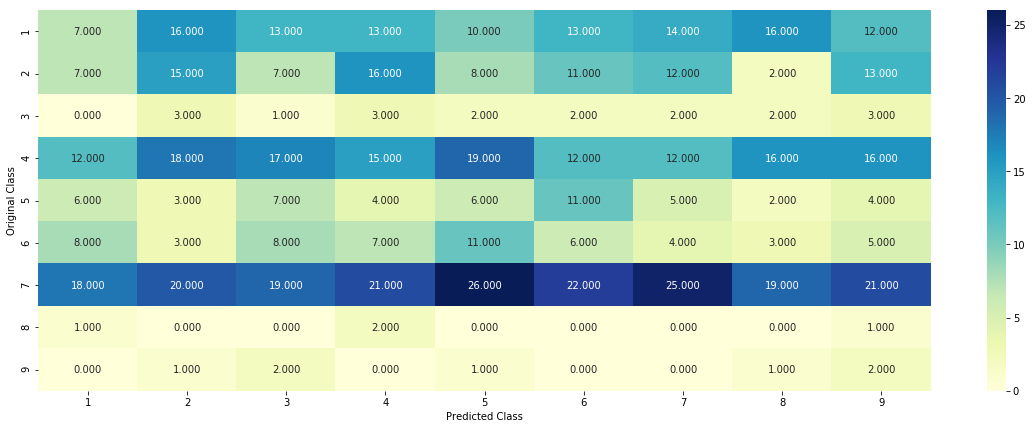

-------------------------------------------------------------------------------- Precision matrix (Columm Sum=1) ------------------------------------------------------------


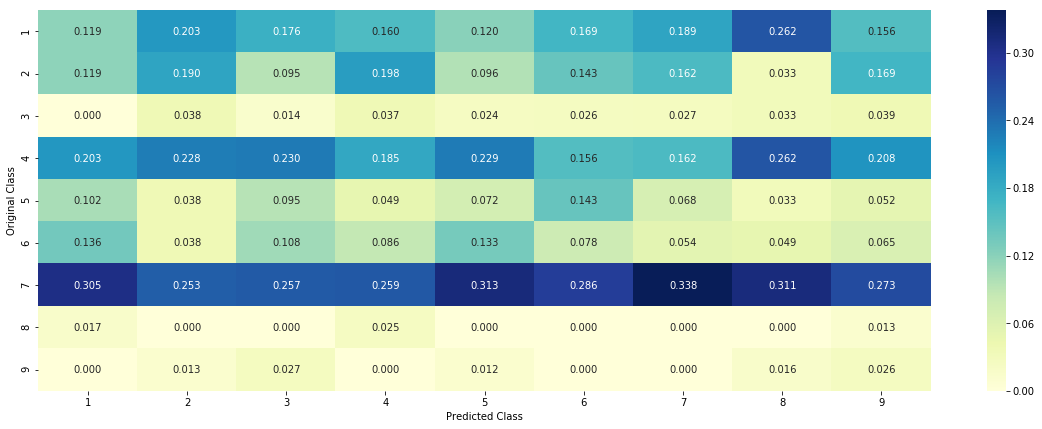

-------------------------------------------------------------------------------- Recall matrix (Row sum=1) ------------------------------------------------------------


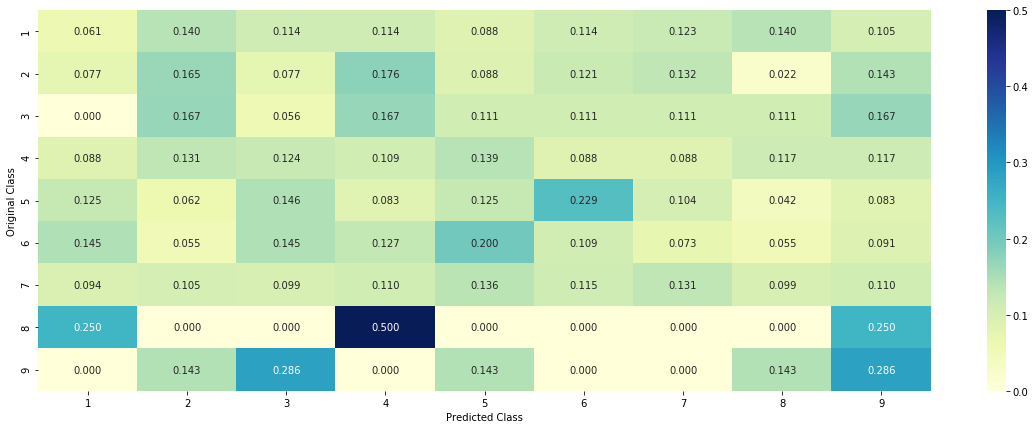

In [19]:
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039
test_data_len = test_df.shape[0]
cv_data_len = cv_df.shape[0]

# we create a output array that has exactly same size as the CV data
cv_predicted_y = np.zeros((cv_data_len,9))
for i in range(cv_data_len):
    rand_probs = np.random.rand(1,9)
    cv_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Cross Validation Data using Random Model",log_loss(y_cv,cv_predicted_y, eps=1e-15))


# Test-Set error.
#we create a output array that has exactly same as the test data
test_predicted_y = np.zeros((test_data_len,9))
for i in range(test_data_len):
    rand_probs = np.random.rand(1,9)
    test_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test,test_predicted_y, eps=1e-15))

predicted_y =np.argmax(test_predicted_y, axis=1)

plot_confusion_matrix(y_test, predicted_y+1)

### Univariate Analysis to Measure the Individual Feature Importance in order to predict the Class (yi's)

### Popular ways to Encode categorical feature are 
### 1. One-hot-encoding
### 2. Response Coding

### 1. Univariate analysis on GENE feature to measure its importance in predicting yi's

In [20]:
######################################### Code for Response Coding method ######################################################

# with Laplace smoothing.
# alpha : used for laplace smoothing
# feature: ['gene', 'variation']
# df: ['train_df', 'test_df', 'cv_df']
# algorithm
# ----------
# Considering all unique values and the number of occurances of given feature in train data dataframe
# building a vector (1*9) , the first element = (number of times it occured in class1 + 10*alpha / number of time it occurred in total data+90*alpha)
# gv_dict is like a look up table, for every gene it store a (1*9) representation of it
# for a value of feature in df:
# if it is in train data:
# we add the vector that was stored in 'gv_dict' look up table to 'gv_fea'
# if it is not there is train:
# we add [1/9, 1/9, 1/9, 1/9,1/9, 1/9, 1/9, 1/9, 1/9] to 'gv_fea'
# return 'gv_fea'
# ----------------------

# get_gv_fea_dict: Get Gene varaition Feature Dict
def get_gv_fea_dict(alpha, feature, df):
    # value_count: it contains a dict like
    # print(train_df['Gene'].value_counts())
    # output:
    #        {BRCA1      174
    #         TP53       106
    #         EGFR        86
    #         BRCA2       75
    #         PTEN        69
    #         KIT         61
    #         BRAF        60
    #         ERBB2       47
    #         PDGFRA      46
    #         ...}
    # print(train_df['Variation'].value_counts())
    # output:
    # {
    # Truncating_Mutations                     63
    # Deletion                                 43
    # Amplification                            43
    # Fusions                                  22
    # Overexpression                            3
    # E17K                                      3
    # Q61L                                      3
    # S222D                                     2
    # P130S                                     2
    # ...
    # }
    value_count = train_df[feature].value_counts()
    
    # gv_dict : Gene Variation Dict, which contains the probability array for each gene/variation
    gv_dict = dict()
    
    # denominator will contain the number of time that particular feature occured in whole data
    for i, denominator in value_count.items():
        # vec will contain (p(yi==1/Gi) probability of gene/variation belongs to perticular class
        # vec is 9 diamensional vector
        vec = []
        for k in range(1,10):
            # print(train_df.loc[(train_df['Class']==1) & (train_df['Gene']=='BRCA1')])
            #         ID   Gene             Variation  Class  
            # 2470  2470  BRCA1                S1715C      1   
            # 2486  2486  BRCA1                S1841R      1   
            # 2614  2614  BRCA1                   M1R      1   
            # 2432  2432  BRCA1                L1657P      1   
            # 2567  2567  BRCA1                T1685A      1   
            # 2583  2583  BRCA1                E1660G      1   
            # 2634  2634  BRCA1                W1718L      1   
            # cls_cnt.shape[0] will return the number of rows

            cls_cnt = train_df.loc[(train_df['Class']==k) & (train_df[feature]==i)]
            
            # cls_cnt.shape[0](numerator) will contain the number of time that particular feature occured in whole data
            vec.append((cls_cnt.shape[0] + alpha*10)/ (denominator + 90*alpha))

        # we are adding the gene/variation to the dict as key and vec as value
        gv_dict[i]=vec
    return gv_dict

# Get Gene variation feature
def get_gv_feature(alpha, feature, df):
    # print(gv_dict)
    #     {'BRCA1': [0.20075757575757575, 0.03787878787878788, 0.068181818181818177, 0.13636363636363635, 0.25, 0.19318181818181818, 0.03787878787878788, 0.03787878787878788, 0.03787878787878788], 
    #      'TP53': [0.32142857142857145, 0.061224489795918366, 0.061224489795918366, 0.27040816326530615, 0.061224489795918366, 0.066326530612244902, 0.051020408163265307, 0.051020408163265307, 0.056122448979591837], 
    #      'EGFR': [0.056818181818181816, 0.21590909090909091, 0.0625, 0.068181818181818177, 0.068181818181818177, 0.0625, 0.34659090909090912, 0.0625, 0.056818181818181816], 
    #      'BRCA2': [0.13333333333333333, 0.060606060606060608, 0.060606060606060608, 0.078787878787878782, 0.1393939393939394, 0.34545454545454546, 0.060606060606060608, 0.060606060606060608, 0.060606060606060608], 
    #      'PTEN': [0.069182389937106917, 0.062893081761006289, 0.069182389937106917, 0.46540880503144655, 0.075471698113207544, 0.062893081761006289, 0.069182389937106917, 0.062893081761006289, 0.062893081761006289], 
    #      'KIT': [0.066225165562913912, 0.25165562913907286, 0.072847682119205295, 0.072847682119205295, 0.066225165562913912, 0.066225165562913912, 0.27152317880794702, 0.066225165562913912, 0.066225165562913912], 
    #      'BRAF': [0.066666666666666666, 0.17999999999999999, 0.073333333333333334, 0.073333333333333334, 0.093333333333333338, 0.080000000000000002, 0.29999999999999999, 0.066666666666666666, 0.066666666666666666],
    #      ...
    #     }
    gv_dict = get_gv_fea_dict(alpha, feature, df)
    # value_count is similar in get_gv_fea_dict
    value_count = train_df[feature].value_counts()
    
    # gv_fea: Gene_variation feature, it will contain the feature for each feature value in the data
    gv_fea = []
    # for every feature values in the given data frame we will check if it is there in the train data then we will add the feature to gv_fea
    # if not we will add [1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9] to gv_fea
    for index, row in df.iterrows():
        if row[feature] in dict(value_count).keys():
            gv_fea.append(gv_dict[row[feature]])
        else:
            gv_fea.append([1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9])
#             gv_fea.append([-1,-1,-1,-1,-1,-1,-1,-1,-1])
    return gv_fea

when we caculate the probability of a feature belongs to any particular class, we apply laplace smoothing
<li>(numerator + 10\*alpha) / (denominator + 90\*alpha) </li>

In [21]:
################################################## Important Points about 'GENE' feature #######################################
# Gene feature is a categorical variable
# Number of unique values and distribution of points in gene feautre 
unique_genes = train_df['Gene'].value_counts()
print('Number of Unique Genes :', unique_genes.shape[0])
# the top 10 genes that occured most
print(unique_genes.head(10))

Number of Unique Genes : 235
BRCA1     185
TP53      102
EGFR       98
BRCA2      77
PTEN       72
KIT        65
BRAF       57
ALK        44
ERBB2      43
PIK3CA     36
Name: Gene, dtype: int64


### Plotting the Histogram and Cummulative Densiy Function(CDF) Plot 

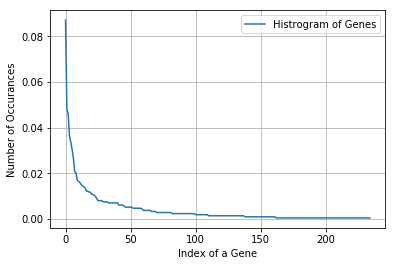

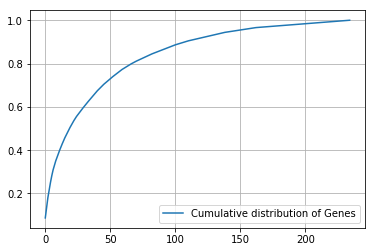

In [22]:
########## There are 229 different categories of genes in the train data, and they are distibuted as follows #################


s = sum(unique_genes.values);
h = unique_genes.values/s; # kind of normalizing
plt.plot(h, label="Histrogram of Genes")
plt.xlabel('Index of a Gene')
plt.ylabel('Number of Occurances')
plt.legend()
plt.grid()
plt.show()


#################################### CDF plot ####################################################################

c = np.cumsum(h)
plt.plot(c,label='Cumulative distribution of Genes')
plt.grid()
plt.legend()
plt.show()

In [23]:
########################################## Featurizing the GENE feature using one-hot-encoding ################################

# choosing the appropriate featurization based on the ML model we use. 
# For this problem of multi-class classification with categorical features,Logistic Regression, one-hot encoding is better 
# while response coding is better for Random Forests, but we will test both encoding methods for the gene feature 

In [24]:
######################################## testing the response-coding of the Gene feature #######################################
# alpha is used for laplace smoothing
alpha = 1
# train gene feature
train_gene_feature_responseCoding = np.array(get_gv_feature(alpha, "Gene", train_df))
# test gene feature
test_gene_feature_responseCoding = np.array(get_gv_feature(alpha, "Gene", test_df))
# cross validation gene feature
cv_gene_feature_responseCoding = np.array(get_gv_feature(alpha, "Gene", cv_df))

####################################### feature conversion ###########################################
print("train_gene_feature_responseCoding is the converted feature using respone coding method. The shape of gene feature:", train_gene_feature_responseCoding.shape)

train_gene_feature_responseCoding is the converted feature using respone coding method. The shape of gene feature: (2124, 9)


In [25]:
########################################### testing the one-hot encoding of Gene feature #######################################

gene_vectorizer = CountVectorizer()
train_gene_feature_onehotCoding = gene_vectorizer.fit_transform(train_df['Gene'])
test_gene_feature_onehotCoding = gene_vectorizer.transform(test_df['Gene'])
cv_gene_feature_onehotCoding = gene_vectorizer.transform(cv_df['Gene'])

In [26]:
print("train_gene_feature_onehotCoding is the converted feature using one-hot encoding method. The shape of gene feature:", train_gene_feature_onehotCoding.shape)

train_gene_feature_onehotCoding is the converted feature using one-hot encoding method. The shape of gene feature: (2124, 234)


In [27]:
train_df['Gene'].head()

2252     PTEN
1683     FLT3
1926      SMO
191      EGFR
2667    BRCA1
Name: Gene, dtype: object

In [28]:
gene_vectorizer.get_feature_names()

['abl1',
 'acvr1',
 'ago2',
 'akt1',
 'akt2',
 'akt3',
 'alk',
 'apc',
 'ar',
 'araf',
 'arid1a',
 'arid1b',
 'arid2',
 'asxl2',
 'atm',
 'atr',
 'atrx',
 'aurka',
 'aurkb',
 'axin1',
 'b2m',
 'bap1',
 'bcl10',
 'bcl2',
 'bcl2l11',
 'bcor',
 'braf',
 'brca1',
 'brca2',
 'brd4',
 'brip1',
 'btk',
 'card11',
 'carm1',
 'casp8',
 'cbl',
 'ccnd1',
 'ccnd2',
 'ccnd3',
 'ccne1',
 'cdh1',
 'cdk12',
 'cdk4',
 'cdk6',
 'cdkn1a',
 'cdkn1b',
 'cdkn2a',
 'cdkn2b',
 'cdkn2c',
 'cebpa',
 'chek2',
 'cic',
 'crebbp',
 'ctcf',
 'ctla4',
 'ctnnb1',
 'ddr2',
 'dicer1',
 'dnmt3a',
 'dnmt3b',
 'dusp4',
 'egfr',
 'eif1ax',
 'elf3',
 'ep300',
 'epas1',
 'epcam',
 'erbb2',
 'erbb3',
 'erbb4',
 'ercc2',
 'ercc3',
 'ercc4',
 'erg',
 'errfi1',
 'esr1',
 'etv1',
 'etv6',
 'ewsr1',
 'ezh2',
 'fam58a',
 'fanca',
 'fancc',
 'fat1',
 'fbxw7',
 'fgf19',
 'fgf3',
 'fgf4',
 'fgfr1',
 'fgfr2',
 'fgfr3',
 'fgfr4',
 'flt1',
 'flt3',
 'foxa1',
 'foxl2',
 'foxp1',
 'fubp1',
 'gna11',
 'gnaq',
 'gnas',
 'h3f3a',
 'hist1h1c',


#### To test how good is GENE feature in predicting yi's we'll build a simulated model using only the GENE feature, in this case I chose Logistic Regression model(with one-hot-encoding) to test the results and predict yi's 

For values of alpha =  1e-05 The log loss is: 1.3876928410854004
For values of alpha =  0.0001 The log loss is: 1.2191571038997344
For values of alpha =  0.001 The log loss is: 1.234266969305267
For values of alpha =  0.01 The log loss is: 1.3480073990357402
For values of alpha =  0.1 The log loss is: 1.460812800332639
For values of alpha =  1 The log loss is: 1.504385382035045


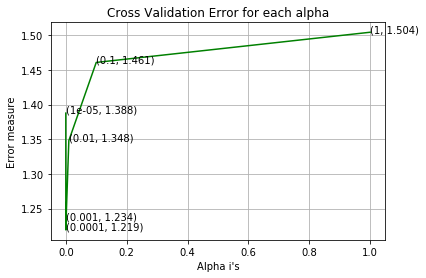

For values of best alpha =  0.0001 The train log loss is: 1.0473271216000941
For values of best alpha =  0.0001 The cross validation log loss is: 1.2191571038997344
For values of best alpha =  0.0001 The test log loss is: 1.2029940588119854


In [29]:
alpha = [10 ** x for x in range(-5, 1)] # hyperparameter for SGD classifier.

cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42) #SGDClassifier with loss=log is LOGISTIC REGRESSION MODEL
    clf.fit(train_gene_feature_onehotCoding, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_gene_feature_onehotCoding, y_train)
    predict_y = sig_clf.predict_proba(cv_gene_feature_onehotCoding)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_gene_feature_onehotCoding, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_gene_feature_onehotCoding, y_train)

predict_y = sig_clf.predict_proba(train_gene_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_gene_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_gene_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


### Conclusion for the "Gene" feature :
####     * Since cv log-loss and test log losses are < 2.5(log-loss of Random Model), we conclude 'GENE' is an imp feature.
####     * It has low cv-log-loss & test-log-loss values which are close in value hence GENE feature is very stable.


### 2. Performing Univariate Analysis on the 'VARIATION' feature 

In [30]:
# Variation is also a Categorical feature 
# The code below shows the details and unique values for the VARIATION feature 
unique_variations = train_df['Variation'].value_counts()
print('Number of Unique Variations :', unique_variations.shape[0])
# the top 10 variations that occured most
print(unique_variations.head(10))

Number of Unique Variations : 1931
Truncating_Mutations    65
Deletion                47
Amplification           40
Fusions                 20
Overexpression           5
Q61R                     3
F384L                    2
Q61L                     2
K117N                    2
ETV6-NTRK3_Fusion        2
Name: Variation, dtype: int64


In [31]:
print("There are", unique_variations.shape[0] ,"different categories of variations in the train data, and they are distibuted as follows",)

There are 1931 different categories of variations in the train data, and they are distibuted as follows


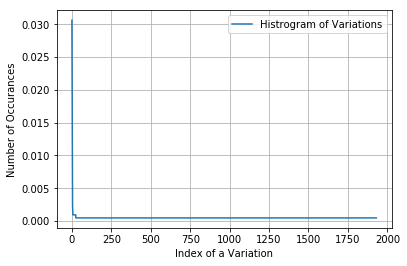

[0.03060264 0.0527307  0.07156309 ... 0.99905838 0.99952919 1.        ]


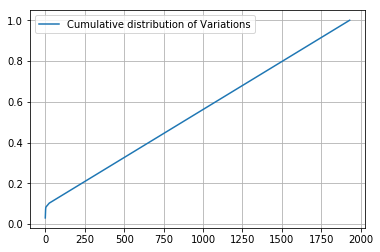

In [32]:
######################### Plotting the Histogram & CDF for VARIATION feature ###################################################

s = sum(unique_variations.values);
h = unique_variations.values/s;
plt.plot(h, label="Histrogram of Variations")
plt.xlabel('Index of a Variation')
plt.ylabel('Number of Occurances')
plt.legend()
plt.grid()
plt.show()

###################################### CODE FOR CDF ############################################################################

c = np.cumsum(h)
print(c)
plt.plot(c,label='Cumulative distribution of Variations')
plt.grid()
plt.legend()
plt.show()

#### Featurizing the VARIATION feature using
#### 1. Response Coding 
#### 2. OneHotEncoding

In [33]:
############################################# Using Response Coding #########################################################

# alpha is used for laplace smoothing
alpha = 1
# train gene feature
train_variation_feature_responseCoding = np.array(get_gv_feature(alpha, "Variation", train_df))
# test gene feature
test_variation_feature_responseCoding = np.array(get_gv_feature(alpha, "Variation", test_df))
# cross validation gene feature
cv_variation_feature_responseCoding = np.array(get_gv_feature(alpha, "Variation", cv_df))

In [34]:
print("train_variation_feature_responseCoding is the converted feature using the response coding method. The shape of Variation feature:", train_variation_feature_responseCoding.shape)

train_variation_feature_responseCoding is the converted feature using the response coding method. The shape of Variation feature: (2124, 9)


In [35]:
#################################### featurization using one-hot-encoding ####################################################

# one-hot encoding of variation feature.
variation_vectorizer = CountVectorizer()
train_variation_feature_onehotCoding = variation_vectorizer.fit_transform(train_df['Variation'])
test_variation_feature_onehotCoding = variation_vectorizer.transform(test_df['Variation'])
cv_variation_feature_onehotCoding = variation_vectorizer.transform(cv_df['Variation'])

In [36]:
print("train_variation_feature_onehotEncoded is converted feature using the onne-hot encoding method. The shape of Variation feature:", train_variation_feature_onehotCoding.shape)

train_variation_feature_onehotEncoded is converted feature using the onne-hot encoding method. The shape of Variation feature: (2124, 1957)


For values of alpha =  1e-05 The log loss is: 1.7261671004680526
For values of alpha =  0.0001 The log loss is: 1.711116041678675
For values of alpha =  0.001 The log loss is: 1.7042336270340408
For values of alpha =  0.01 The log loss is: 1.715371906977964
For values of alpha =  0.1 The log loss is: 1.7285685037775682
For values of alpha =  1 The log loss is: 1.73280106279681


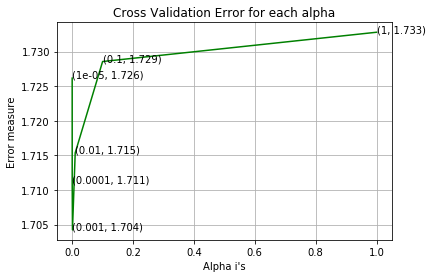

For values of best alpha =  0.001 The train log loss is: 1.0771909296409894
For values of best alpha =  0.001 The cross validation log loss is: 1.7042336270340408
For values of best alpha =  0.001 The test log loss is: 1.7095023143718031


In [37]:
#################### Building Logistic Regression model using only 'Variation' feature along with One-hot-encoding ############

alpha = [10 ** x for x in range(-5, 1)]

cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_variation_feature_onehotCoding, y_train)
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_variation_feature_onehotCoding, y_train)
    predict_y = sig_clf.predict_proba(cv_variation_feature_onehotCoding)
    
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_variation_feature_onehotCoding, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_variation_feature_onehotCoding, y_train)

predict_y = sig_clf.predict_proba(train_variation_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_variation_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_variation_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))




### Conclusion for the Variation feature :
####     * Since cv log-loss and test log losses are < 2.5(log-loss of Random Model), we conclude 'Variation' is also an imp feature.
####     * It has low cv-log-loss & test-log-loss values but the gap is significant and is more than that in 'Gene' feature.
####     * Hence, 'Variation' feature might be unstable 

### 3. Performing univariate analysis on 'TEXT' feature 

##### Important Objectives while featurizing TEXT 

 1. To find the number of unique words in train data
 2. To know the distribution of frequencies 
 3. How to featurize the TEXT field
 4. Usefullness of TEXT feature in predicting the yi's 
 5. To check the stability of TEXT feature accross CV,test,Train


In [38]:
# Creating a dictionary function

# cls_text is a data frame
# for every row in data fram consider the 'TEXT'
# split the words by space
# make a dict with those words
# increment its count whenever we see that word

def extract_dictionary_paddle(cls_text):
    dictionary = defaultdict(int)
    for index, row in cls_text.iterrows():
        for word in row['TEXT'].split():
            dictionary[word] +=1
    return dictionary

In [39]:
############################## Creating a Response Coding function for TEXT feature ############################################

# https://stackoverflow.com/a/1602964
import math
def get_text_responsecoding(df):
    text_feature_responseCoding = np.zeros((df.shape[0],9))
    for i in range(0,9):
        row_index = 0
        for index, row in df.iterrows():
            sum_prob = 0
            for word in row['TEXT'].split():
                sum_prob += math.log(((dict_list[i].get(word,0)+10 )/(total_dict.get(word,0)+90)))
            text_feature_responseCoding[row_index][i] = math.exp(sum_prob/len(row['TEXT'].split()))
            row_index += 1
    return text_feature_responseCoding

In [40]:
# building a CountVectorizer with all the words that occured minimum 3 times in train data
# CountVectorizer method is similar to BoW(Bag of Words) in the case of text data
text_vectorizer = CountVectorizer(min_df=3)
train_text_feature_onehotCoding = text_vectorizer.fit_transform(train_df['TEXT'])
# getting all the feature names (words)
train_text_features= text_vectorizer.get_feature_names()

# train_text_feature_onehotCoding.sum(axis=0).A1 will sum every row and returns (1*number of features) vector
train_text_fea_counts = train_text_feature_onehotCoding.sum(axis=0).A1

# zip(list(text_features),text_fea_counts) will zip a word with its number of times it occured
text_fea_dict = dict(zip(list(train_text_features),train_text_fea_counts))


print("Total number of unique words in train data :", len(train_text_features))

Total number of unique words in train data : 53150


In [41]:
dict_list = []
# dict_list =[] contains 9 dictoinaries each corresponds to a class
for i in range(1,10):
    cls_text = train_df[train_df['Class']==i]
    # build a word dict based on the words in that class
    dict_list.append(extract_dictionary_paddle(cls_text))
    # append it to dict_list

# dict_list[i] is build on i'th  class text data
# total_dict is buid on whole training text data
total_dict = extract_dictionary_paddle(train_df)


confuse_array = []
for i in train_text_features:
    ratios = []
    max_val = -1
    for j in range(0,9):
        ratios.append((dict_list[j][i]+10 )/(total_dict[i]+90))
    confuse_array.append(ratios)
confuse_array = np.array(confuse_array)

In [42]:
################################################# Response coding of 'text' features #########################################

train_text_feature_responseCoding  = get_text_responsecoding(train_df)
test_text_feature_responseCoding  = get_text_responsecoding(test_df)
cv_text_feature_responseCoding  = get_text_responsecoding(cv_df)

In [43]:
# normalizing every feature
train_text_feature_onehotCoding = normalize(train_text_feature_onehotCoding, axis=0)

# we use the same vectorizer that was trained on train data
test_text_feature_onehotCoding = text_vectorizer.transform(test_df['TEXT'])
# normalizing every feature
test_text_feature_onehotCoding = normalize(test_text_feature_onehotCoding, axis=0)

# we use the same vectorizer that was trained on train data and normalizing
cv_text_feature_onehotCoding = text_vectorizer.transform(cv_df['TEXT'])
cv_text_feature_onehotCoding = normalize(cv_text_feature_onehotCoding, axis=0)

In [44]:
#https://stackoverflow.com/a/2258273/4084039
sorted_text_fea_dict = dict(sorted(text_fea_dict.items(), key=lambda x: x[1] , reverse=True))
sorted_text_occur = np.array(list(sorted_text_fea_dict.values()))

In [45]:
# Number of words for a given frequency.
print(Counter(sorted_text_occur))

Counter({3: 5087, 4: 3484, 5: 3119, 6: 2825, 7: 2526, 8: 1795, 9: 1440, 10: 1424, 12: 1289, 13: 1200, 11: 1076, 14: 936, 15: 901, 16: 717, 18: 701, 17: 643, 24: 597, 20: 583, 19: 530, 21: 487, 22: 466, 25: 417, 38: 391, 26: 391, 27: 389, 30: 370, 28: 350, 23: 334, 31: 319, 33: 292, 54: 290, 29: 273, 32: 251, 36: 248, 40: 237, 34: 223, 35: 218, 37: 217, 41: 210, 42: 198, 39: 197, 48: 196, 45: 187, 44: 172, 43: 170, 46: 167, 50: 164, 60: 151, 55: 150, 47: 149, 56: 146, 49: 144, 52: 142, 51: 142, 64: 131, 57: 130, 58: 127, 53: 124, 70: 119, 61: 113, 62: 111, 68: 106, 63: 102, 82: 99, 75: 98, 66: 98, 59: 98, 65: 95, 73: 92, 71: 91, 72: 90, 69: 88, 67: 88, 80: 87, 81: 84, 78: 79, 77: 79, 90: 78, 84: 78, 88: 77, 76: 77, 74: 77, 89: 74, 91: 71, 83: 71, 96: 70, 92: 70, 93: 69, 108: 66, 98: 64, 87: 61, 86: 61, 79: 59, 104: 56, 85: 53, 115: 52, 99: 52, 114: 51, 103: 51, 97: 50, 111: 49, 94: 49, 109: 48, 105: 48, 101: 48, 126: 47, 122: 47, 130: 46, 123: 46, 119: 46, 102: 46, 100: 46, 120: 45, 112

### Training a Logistic Regression Model using 'TEXT' feature only 

For values of alpha =  1e-05 The log loss is: 1.3942442102073505
For values of alpha =  0.0001 The log loss is: 1.3714595132816263
For values of alpha =  0.001 The log loss is: 1.2677490350765457
For values of alpha =  0.01 The log loss is: 1.2921599133913197
For values of alpha =  0.1 The log loss is: 1.4454904861379658
For values of alpha =  1 The log loss is: 1.649809478322828


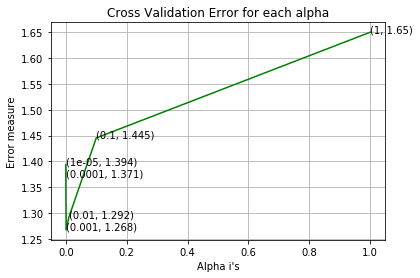

For values of best alpha =  0.001 The train log loss is: 0.7812210762961086
For values of best alpha =  0.001 The cross validation log loss is: 1.2677490350765457
For values of best alpha =  0.001 The test log loss is: 1.1982618555445503


In [46]:
# Training a Logistic regression+Calibration model using text features which are on-hot encoded

alpha = [10 ** x for x in range(-5, 1)]

cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_text_feature_onehotCoding, y_train)
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_text_feature_onehotCoding, y_train)
    predict_y = sig_clf.predict_proba(cv_text_feature_onehotCoding)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_text_feature_onehotCoding, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_text_feature_onehotCoding, y_train)

predict_y = sig_clf.predict_proba(train_text_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_text_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_text_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


In [47]:
######################## Checking the Stability of 'TEXT' feature accross the Train,Test and CV datasets ######################

def get_intersec_text(df):
    df_text_vec = CountVectorizer(min_df=3)
    df_text_fea = df_text_vec.fit_transform(df['TEXT'])
    df_text_features = df_text_vec.get_feature_names()

    df_text_fea_counts = df_text_fea.sum(axis=0).A1
    df_text_fea_dict = dict(zip(list(df_text_features),df_text_fea_counts))
    len1 = len(set(df_text_features))
    len2 = len(set(train_text_features) & set(df_text_features))
    return len1,len2

len1,len2 = get_intersec_text(test_df)
print(np.round((len2/len1)*100, 3), "% of word of test data appeared in train data")
len1,len2 = get_intersec_text(cv_df)
print(np.round((len2/len1)*100, 3), "% of word of Cross Validation appeared in train data")


95.867 % of word of test data appeared in train data
98.151 % of word of Cross Validation appeared in train data


### Conclusions of performing univariate analysis on "Text" feature

1. We observed a train-log-loss of 0.771, test-log-loss = 1.11 and cv-log-loss = 1.21, hence we conclude it is an imp feature.
2. Since there is a huge overlap of words in test and train data and of cv data, we confirm that 'TEXT' feature is very stable.
3. We conclude that "TEXT' is the most imp feature as out of the Gene,Variation,text.. only text has lowest cv loss and test loss.



## Building Machine Learning Models (Multi-variate analysis)

#### Using all the 3 features i.e (GENE,VARIATION,TEXT)  to build a Model 
#### FEATURIZATION METHODS USED 

1. One-Hot-encoding - This encoding gives us a high dimensional data
2. Response Coding - We get a low Dimension data and hence the Decision Trees can handle then well enough

#### I am testing with NAIVE BAYES,KNN & LOGISTIC REGRESSION MODEL and determine the best accuracy amongst the 3 models 

In [48]:
#Data preparation for ML models.

#Misc. functionns for ML models
# This function will be used for LOGISTIC REGRESSION MODEL


def predict_and_plot_confusion_matrix(train_x, train_y,test_x, test_y, clf):
    clf.fit(train_x, train_y)
    # Logistic Regression output yi's need to Calibrated to get the suitable yi's probablitiy 
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    pred_y = sig_clf.predict(test_x)

    # for calculating log_loss we willl provide the array of probabilities belongs to each class
    print("Log loss :",log_loss(test_y, sig_clf.predict_proba(test_x)))
    # calculating the number of data points that are misclassified
    print("Number of mis-classified points :", np.count_nonzero((pred_y- test_y))/test_y.shape[0])
    plot_confusion_matrix(test_y, pred_y)

In [49]:
def report_log_loss(train_x, train_y, test_x, test_y,  clf):
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    sig_clf_probs = sig_clf.predict_proba(test_x)
    return log_loss(test_y, sig_clf_probs, eps=1e-15)

In [50]:
# this function will be used just for naive bayes
# for the given indices, we will print the name of the features
# and we will check whether the feature present in the test point text or not

def get_impfeature_names(indices, text, gene, var, no_features):
    gene_count_vec = CountVectorizer()
    var_count_vec = CountVectorizer()
    text_count_vec = CountVectorizer(min_df=3)
    
    gene_vec = gene_count_vec.fit(train_df['Gene'])
    var_vec  = var_count_vec.fit(train_df['Variation'])
    text_vec = text_count_vec.fit(train_df['TEXT'])
    
    fea1_len = len(gene_vec.get_feature_names())
    fea2_len = len(var_count_vec.get_feature_names())
    
    word_present = 0
    for i,v in enumerate(indices):
        if (v < fea1_len):
            word = gene_vec.get_feature_names()[v]
            yes_no = True if word == gene else False
            if yes_no:
                word_present += 1
                print(i, "Gene feature [{}] present in test data point [{}]".format(word,yes_no))
        elif (v < fea1_len+fea2_len):
            word = var_vec.get_feature_names()[v-(fea1_len)]
            yes_no = True if word == var else False
            if yes_no:
                word_present += 1
                print(i, "variation feature [{}] present in test data point [{}]".format(word,yes_no))
        else:
            word = text_vec.get_feature_names()[v-(fea1_len+fea2_len)]
            yes_no = True if word in text.split() else False
            if yes_no:
                word_present += 1
                print(i, "Text feature [{}] present in test data point [{}]".format(word,yes_no))

    print("Out of the top ",no_features," features ", word_present, "are present in query point")

### Stacking (Gene, Variation & Text) features using horizontal stacking (hstack)

In [51]:
# merging gene, variation and text features

# building train, test and cross validation data sets
# a = [[1, 2], 
#      [3, 4]]
# b = [[4, 5], 
#      [6, 7]]
# hstack(a, b) = [[1, 2, 4, 5],
#                [ 3, 4, 6, 7]]

train_gene_var_onehotCoding = hstack((train_gene_feature_onehotCoding,train_variation_feature_onehotCoding))
test_gene_var_onehotCoding = hstack((test_gene_feature_onehotCoding,test_variation_feature_onehotCoding))
cv_gene_var_onehotCoding = hstack((cv_gene_feature_onehotCoding,cv_variation_feature_onehotCoding))

train_x_onehotCoding = hstack((train_gene_var_onehotCoding, train_text_feature_onehotCoding)).tocsr()
train_y = np.array(list(train_df['Class']))

test_x_onehotCoding = hstack((test_gene_var_onehotCoding, test_text_feature_onehotCoding)).tocsr()
test_y = np.array(list(test_df['Class']))

cv_x_onehotCoding = hstack((cv_gene_var_onehotCoding, cv_text_feature_onehotCoding)).tocsr()
cv_y = np.array(list(cv_df['Class']))


train_gene_var_responseCoding = np.hstack((train_gene_feature_responseCoding,train_variation_feature_responseCoding))
test_gene_var_responseCoding = np.hstack((test_gene_feature_responseCoding,test_variation_feature_responseCoding))
cv_gene_var_responseCoding = np.hstack((cv_gene_feature_responseCoding,cv_variation_feature_responseCoding))

train_x_responseCoding = np.hstack((train_gene_var_responseCoding, train_text_feature_responseCoding))
test_x_responseCoding = np.hstack((test_gene_var_responseCoding, test_text_feature_responseCoding))
cv_x_responseCoding = np.hstack((cv_gene_var_responseCoding, cv_text_feature_responseCoding))


In [52]:
print("One hot encoding features :")
print("(number of data points * number of features) in train data = ", train_x_onehotCoding.shape)
print("(number of data points * number of features) in test data = ", test_x_onehotCoding.shape)
print("(number of data points * number of features) in cross validation data =", cv_x_onehotCoding.shape)

One hot encoding features :
(number of data points * number of features) in train data =  (2124, 55341)
(number of data points * number of features) in test data =  (665, 55341)
(number of data points * number of features) in cross validation data = (532, 55341)


In [53]:
print(" Response encoding features :")
print("(number of data points * number of features) in train data = ", train_x_responseCoding.shape)
print("(number of data points * number of features) in test data = ", test_x_responseCoding.shape)
print("(number of data points * number of features) in cross validation data =", cv_x_responseCoding.shape)

 Response encoding features :
(number of data points * number of features) in train data =  (2124, 27)
(number of data points * number of features) in test data =  (665, 27)
(number of data points * number of features) in cross validation data = (532, 27)


### Testing with Baseline Model 

<p style="font-size:20px;text-align:center"> <b> 1. Using NAIVE BAYES as baseline Model </b> </p>

#### Since we are using one-hot-encoding there is 55K+ dimensions & hence the dimensionality is very large.
#### For text based data with large dimensionality Naive Bayes performs very well

for alpha = 1e-05
Log Loss : 1.3253379178065672
for alpha = 0.0001
Log Loss : 1.3135579171312248
for alpha = 0.001
Log Loss : 1.3109343816267336
for alpha = 0.1
Log Loss : 1.281802995135348
for alpha = 1
Log Loss : 1.3024092521491448
for alpha = 10
Log Loss : 1.4047951772284633
for alpha = 100
Log Loss : 1.413775364551944
for alpha = 1000
Log Loss : 1.379811848069485


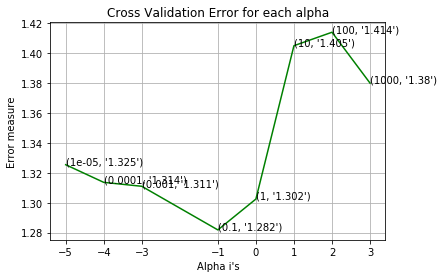

For values of best alpha =  0.1 The train log loss is: 0.908479582605551
For values of best alpha =  0.1 The cross validation log loss is: 1.281802995135348
For values of best alpha =  0.1 The test log loss is: 1.243410914321422


In [54]:
# In Naive Bayes laplace smoothening 'alpha' is the hyperparameter in scikit learn

# sklearn.naive_bayes.MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)

# some of methods of MultinomialNB()
# fit(X, y[, sample_weight])	Fit Naive Bayes classifier according to X, y
# predict(X)	Perform classification on an array of test vectors X.
# predict_log_proba(X)	Return log-probability estimates for the test vector X.
# -----------------------

######################################### Using Calibrated Classifier #####################################################
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
# ----------------------------

alpha = [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = MultinomialNB(alpha=i)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(np.log10(alpha), cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (np.log10(alpha[i]),cv_log_error_array[i]))
plt.grid()
plt.xticks(np.log10(alpha))
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)


predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


#### Plotting the Confusion matrix, Precesion Matrix & Recall Matrix and the Percentage of Misclassified Data (NAIVE BAYES)

Log Loss : 1.281802995135348
Number of missclassified point : 0.39473684210526316
-------------------------------------------------------------------------------- Confusion matrix ------------------------------------------------------------


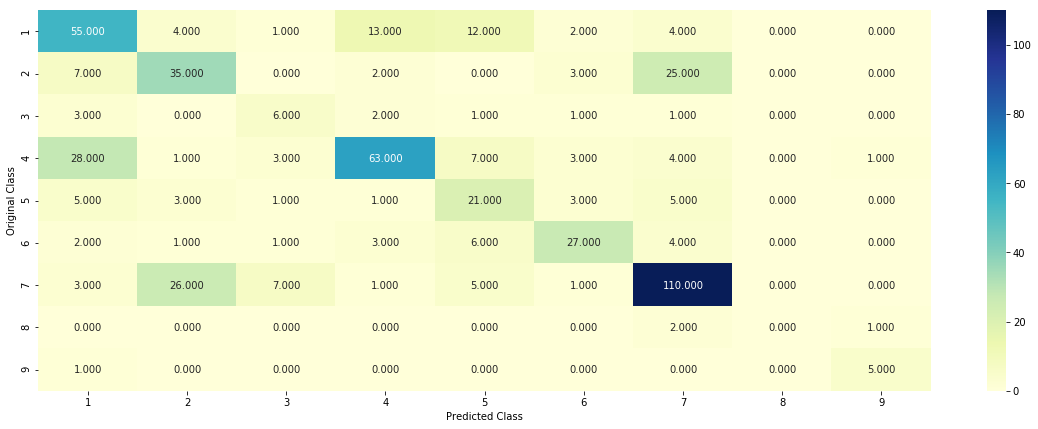

-------------------------------------------------------------------------------- Precision matrix (Columm Sum=1) ------------------------------------------------------------


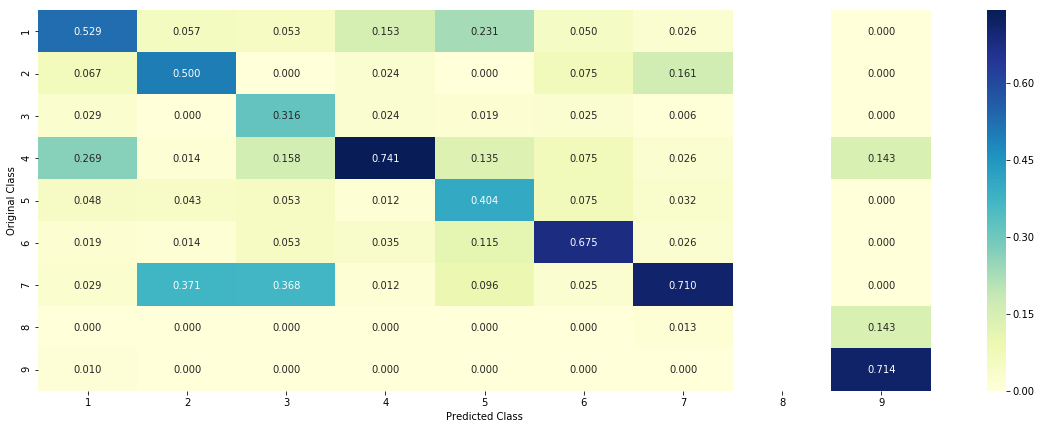

-------------------------------------------------------------------------------- Recall matrix (Row sum=1) ------------------------------------------------------------


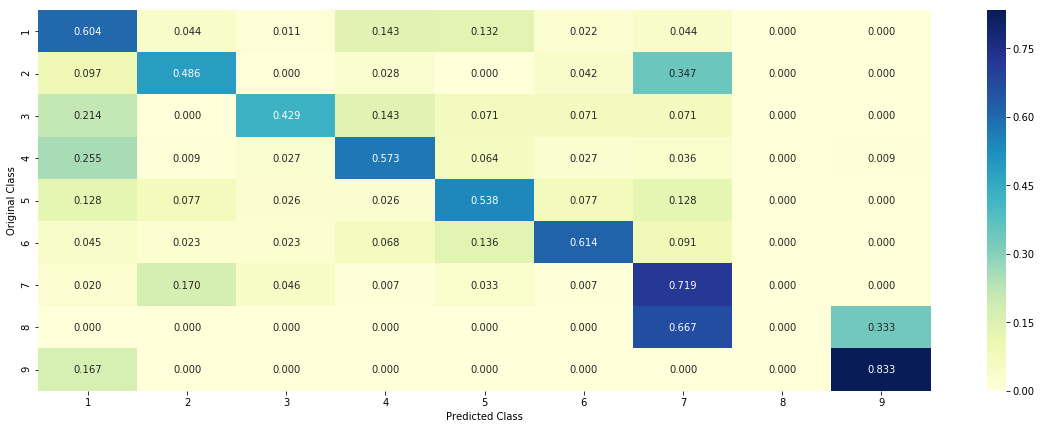

In [55]:
clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)
sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
# to avoid rounding error while multiplying probabilites we use log-probability estimates
print("Log Loss :",log_loss(cv_y, sig_clf_probs))
print("Number of missclassified point :", np.count_nonzero((sig_clf.predict(cv_x_onehotCoding)- cv_y))/cv_y.shape[0])
plot_confusion_matrix(cv_y, sig_clf.predict(cv_x_onehotCoding.toarray()))

### Observations from the NAIVE BAYES Model with one-hot-encoding 

1. The number of misclassified points = 0.411 or 41%
2. The Train Log-loss = 0.859
3. The CV log-loss = 1.317
4. The Test log-loss = 1.258

### Testing Correctly Classfied Points & Feature Importance 

In [56]:
test_point_index = 100
no_feature = 100
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 6
Predicted Class Probabilities: [[0.0857 0.0687 0.0127 0.1046 0.0313 0.5601 0.1291 0.004  0.0036]]
Actual Class : 6
--------------------------------------------------
Out of the top  100  features  0 are present in query point


#### Final Conclusion - 
1.Therefore, we can see that the higest probablity value is [0.4932] that corresponds to Class 4 and is correctly classified out   of the 9 probablities values of the total 9 classes

<p style="font-size:20px;text-align:center"> <b> 2. Using K-Nearest Neighbour(KNN) Model with Response Coding </b> </p>  

#### Since KNN doesnt work very well with high dimensional data due to the curse of dimensionality, hence one-hot-encoding may not work very well. So response coding is chosen as an encoding method

#### Hyperparameter Tuning 

for alpha = 5
Log Loss : 1.0843629388973857
for alpha = 11
Log Loss : 1.0381196247541378
for alpha = 15
Log Loss : 1.0430219136980128
for alpha = 21
Log Loss : 1.0551612093284433
for alpha = 31
Log Loss : 1.076147663251846
for alpha = 41
Log Loss : 1.0820908659982658
for alpha = 51
Log Loss : 1.0840576589734123
for alpha = 99
Log Loss : 1.1150404171416268


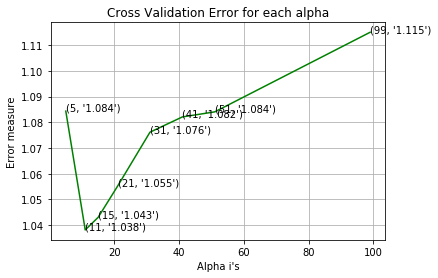

For values of best alpha =  11 The train log loss is: 0.6141492095434178
For values of best alpha =  11 The cross validation log loss is: 1.0381196247541378
For values of best alpha =  11 The test log loss is: 1.010280074982329


In [57]:
# Here the hyperparameter 'K' is alpha in scikitlearn

alpha = [5, 11, 15, 21, 31, 41, 51, 99]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(train_x_responseCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_responseCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_responseCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_responseCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_responseCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_responseCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


#### From the hyper parameter tuning we found the lowest log-loss at alpha(K) = 15 

Log loss : 1.0381196247541378
Number of mis-classified points : 0.3609022556390977
-------------------------------------------------------------------------------- Confusion matrix ------------------------------------------------------------


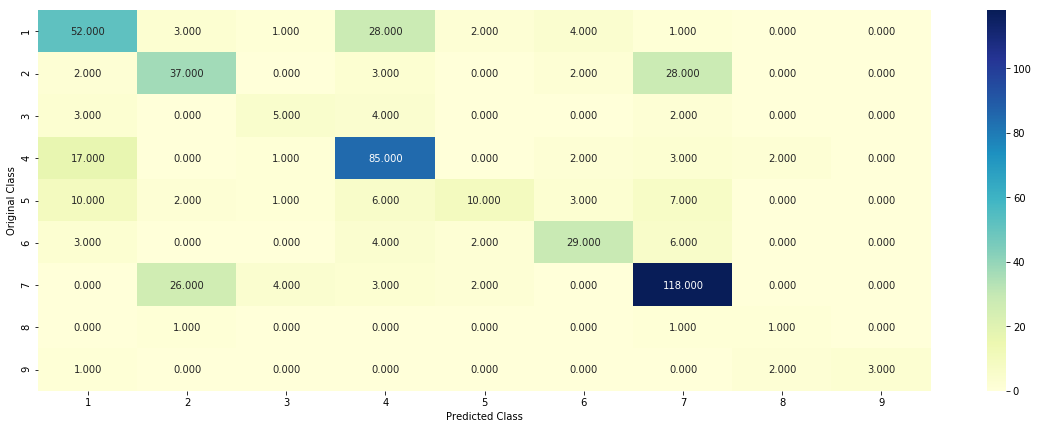

-------------------------------------------------------------------------------- Precision matrix (Columm Sum=1) ------------------------------------------------------------


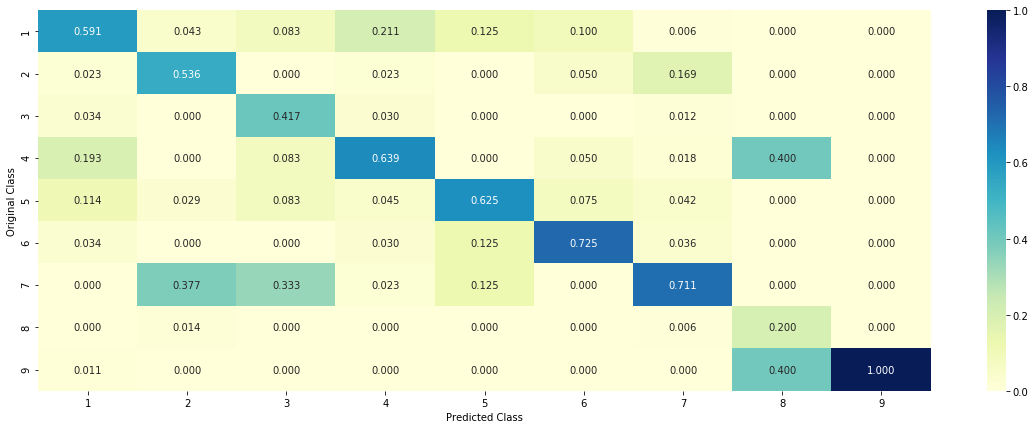

-------------------------------------------------------------------------------- Recall matrix (Row sum=1) ------------------------------------------------------------


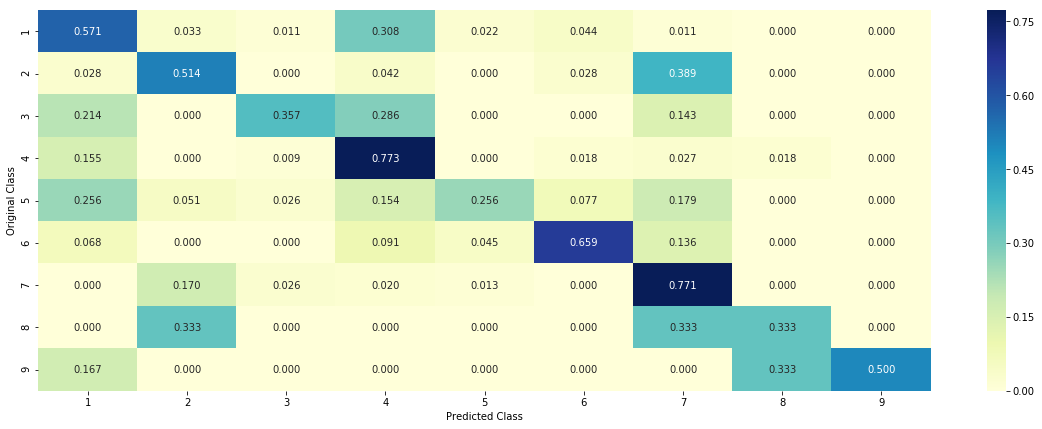

In [58]:
# Plotting Confusion Matix, Precesion Matrix and Recall matrix and Percentage of Misclassified Points
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
predict_and_plot_confusion_matrix(train_x_responseCoding, train_y, cv_x_responseCoding, cv_y, clf)

### Observations from the KNN Model with Response Coding

1. The number of misclassified points = 0.391 or 39%
2. The Train Log-loss = 0.669
3. The CV log-loss = 1.117
4. The Test log-loss = 1.105

### Testing KNN Model with sample query point

#### CORRECT CLASSIFICATION 

In [59]:
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)

test_point_index = 100

predicted_cls = sig_clf.predict(test_x_responseCoding[test_point_index].reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Actual Class :", test_y[test_point_index])
neighbors = clf.kneighbors(test_x_responseCoding[test_point_index].reshape(1, -1), alpha[best_alpha])
print("the k value for knn is",alpha[best_alpha],"and the nearest neighbours of the test points belongs to classes",train_y[neighbors[1][0]])
print("Fequency of nearest points :",Counter(train_y[neighbors[1][0]]))

Predicted Class : 6
Actual Class : 6
the k value for knn is 11 and the nearest neighbours of the test points belongs to classes [6 6 6 6 6 6 6 6 6 6 6]
Fequency of nearest points : Counter({6: 11})


#### INCORRECT CLASSIFICATION

In [60]:
############################################### INCORRECT CLASSIFICATION ####################################################
####### With Query point 2 
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)

test_point_index = 1
predicted_cls = sig_clf.predict(test_x_responseCoding[0].reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Actual Class :", test_y[test_point_index])
neighbors = clf.kneighbors(test_x_responseCoding[test_point_index].reshape(1, -1), alpha[best_alpha])
print("The ",alpha[best_alpha]," nearest neighbours of the test points belongs to classes",train_y[neighbors[1][0]])
print("Fequency of nearest points :",Counter(train_y[neighbors[1][0]]))

Predicted Class : 8
Actual Class : 4
The  11  nearest neighbours of the test points belongs to classes [4 5 1 4 1 4 4 4 1 4 4]
Fequency of nearest points : Counter({4: 7, 1: 3, 5: 1})


### Final Conclusion 

1. From the final output i.e Counter({4:11,5:3,6:1}) we can see that the Class 4 has max nearest neighbours i.e 11 [4:11] and by    majority vote we predict it to be Class 4.
2. KNN models have great interpretability but they lack feature importance and majority voting is dangerous in case of medical    applications because it is easier to make mistakes and misclassify points in majority voting.
3. We only depend on majority vote as we dont have feature importance in the KNN model, hence for medical applications KNN is      not recommended as errors can be fatal.

<p style="font-size:20px;text-align:center"> <b> 3. Using Logistic Regression Classifier with Class balancing </b> </p>

#### Here we will balance the class and as Logistic Regression Models handle high dimensionality smoothly, hence we will use one-hot-encoding 

#### Since the dataset is imbalanced we are performing class balancing 

for alpha = 1e-06
Log Loss : 1.4188408380555801
for alpha = 1e-05
Log Loss : 1.4060138983107586
for alpha = 0.0001
Log Loss : 1.3393128065821573
for alpha = 0.001
Log Loss : 1.1730946409060208
for alpha = 0.01
Log Loss : 1.1748375450640587
for alpha = 0.1
Log Loss : 1.4947594023179265
for alpha = 1
Log Loss : 1.7064685366200336
for alpha = 10
Log Loss : 1.7299595967841492
for alpha = 100
Log Loss : 1.7323352210483591


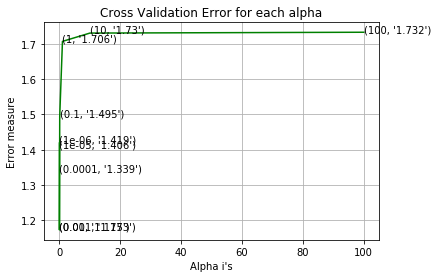

For values of best alpha =  0.001 The train log loss is: 0.6294909747057695
For values of best alpha =  0.001 The cross validation log loss is: 1.1730946409060208
For values of best alpha =  0.001 The test log loss is: 1.1159963615992854


In [61]:
# The hyperparameter value for Logistic Regression is 'lambda'(λ) which will correspond to 'alpha' in the scikitlearn hyperparam

# default parameters

# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

# ----------------------------CalibratedClassifierCV-------------------------------------------------------------------

# Since we are having log-loss,so we will need to Calibrate the output in order to get desired probablity values
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification


alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    # SGDClassifier with l2 regularizer and loss = log is LOGISTIC REGRESSION CLASSIFIER
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

#### From the hyper parameter tuning we found the lowest log-loss at alpha or (λ) = 0.001

#### Evaluating the Misclassified points and plotting Confusion Matrix, Precesion Matrix and Recall Matrix

Log loss : 1.1730946409060208
Number of mis-classified points : 0.36278195488721804
-------------------------------------------------------------------------------- Confusion matrix ------------------------------------------------------------


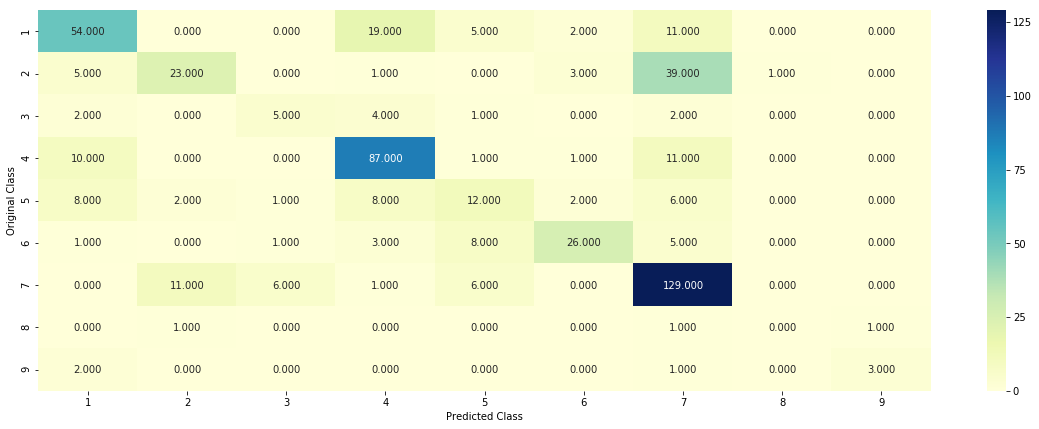

-------------------------------------------------------------------------------- Precision matrix (Columm Sum=1) ------------------------------------------------------------


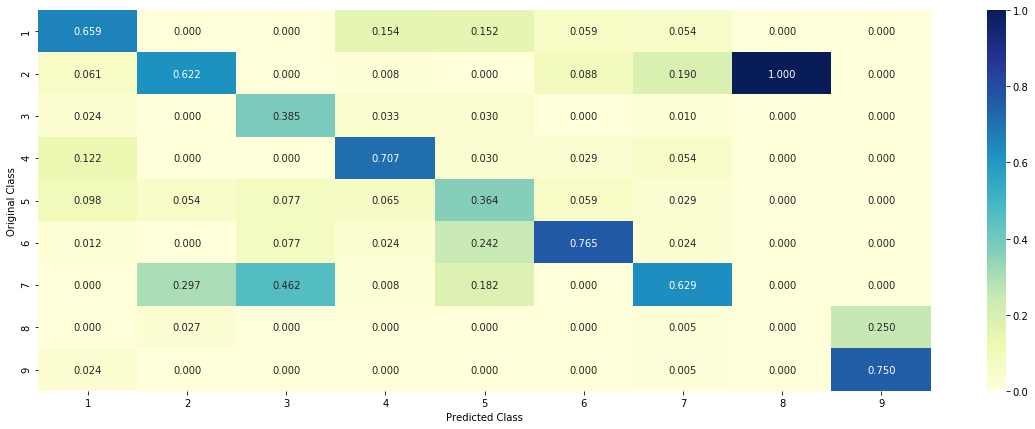

-------------------------------------------------------------------------------- Recall matrix (Row sum=1) ------------------------------------------------------------


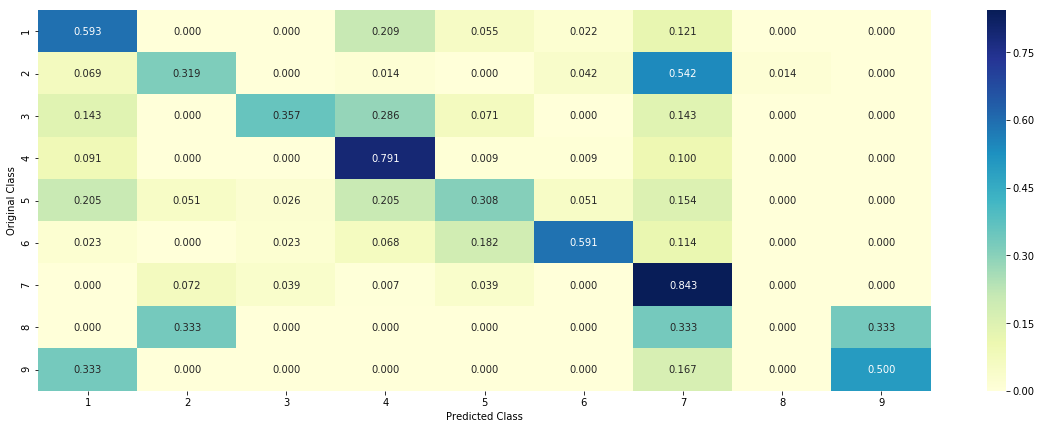

In [62]:
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y, cv_x_onehotCoding, cv_y, clf)

### Observations from the Logistic Regression Model with Class Balancing

1. The number of misclassified points = 0.383 or 38%
2. The Train Log-loss = 0.598
3. The CV log-loss = 1.22
4. The Test log-loss = 1.07

##### We also observed that due to the class balancing in the confusion, precesion and recall matrix the prediction probablity is very high for few points(Darker shaded regions)  and there are large diagonal values in the confusion matrix 

#### Feature Importance 

In [63]:
def get_imp_feature_names(text, indices, removed_ind = []):
    word_present = 0
    tabulte_list = []
    incresingorder_ind = 0
    for i in indices:
        if i < train_gene_feature_onehotCoding.shape[1]:
            tabulte_list.append([incresingorder_ind, "Gene", "Yes"])
        elif i< 18:
            tabulte_list.append([incresingorder_ind,"Variation", "Yes"])
        if ((i > 17) & (i not in removed_ind)) :
            word = train_text_features[i]
            yes_no = True if word in text.split() else False
            if yes_no:
                word_present += 1
            tabulte_list.append([incresingorder_ind,train_text_features[i], yes_no])
        incresingorder_ind += 1
    print(word_present, "most importent features are present in our query point")
    print("-"*50)
    print("The features that are most importent of the ",predicted_cls[0]," class:")
    print (tabulate(tabulte_list, headers=["Index",'Feature name', 'Present or Not']))

#### CORRECTLY CLASSIFIED POINTS 

In [64]:
from tabulate import tabulate
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding,train_y)
test_point_index = 1
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
# print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 5
Predicted Class Probabilities: [[2.879e-01 1.080e-02 5.000e-04 3.860e-02 6.352e-01 2.000e-04 2.000e-02
  6.000e-03 8.000e-04]]
--------------------------------------------------
432 Text feature [subtypes] present in test data point [True]
Out of the top  500  features  1 are present in query point


#### INCORRECTLY CLASSIFIED POINTS 

In [65]:
from tabulate import tabulate
test_point_index = 100
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
indices = np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 6
Predicted Class Probabilities: [[0.058  0.0228 0.0027 0.0217 0.0872 0.79   0.0081 0.0057 0.0039]]
--------------------------------------------------
99 Text feature [african] present in test data point [True]
184 Text feature [v1804d] present in test data point [True]
376 Text feature [910] present in test data point [True]
401 Text feature [ivs2] present in test data point [True]
437 Text feature [3a] present in test data point [True]
480 Text feature [r2659k] present in test data point [True]
495 Text feature [assays] present in test data point [True]
Out of the top  500  features  7 are present in query point


### FINAL CONCLUSION 

1. Out of all the 3 Models (Naive Bayes, KNN , Logistic Regression), the Logistic Regression Model has the lowest log-loss          value.
2. Logistic Regression Model with class balancing has the lowest misclassified points and is very stable.
3. Logistic Regression Model is highly recommended for the multi-class classification, because of Feature Importance.